Import pyspark library, set up SparkContext and SQLContext.

In [34]:
import pyspark
import random

In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
import seaborn as sns

Fill in the missing values in the Sepallength column with the column's mean.

In [38]:
df = pd.read_csv("iris_missing.csv")

Mean

In [39]:
sepalength = df['Sepallength']

In [40]:
sepalength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepallength, Length: 150, dtype: float64

In [41]:
sepalength.mean()

5.82

In [42]:
mean_ = sepalength.mean()

Sepalength is null

In [43]:
sepalength[sepalength.isnull()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Sepalength is nan

In [44]:
sepalength[sepalength.isna()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Fill mean

In [45]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

In [46]:
sepalength.fillna(mean_, inplace=True)

3.1. First, calculate the mean of the Sepallength column.

In [47]:
mean_ = sepalength.mean()

In [48]:
mean_

5.820000000000001

3.2. Now, impute the missing values in the Sepallength column with the column's mean.

In [49]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

In [50]:
df.fillna(1, inplace=True)

4. Compute the correlation matrix for the dataset. Make sure to import the required modules, as shown here:

In [51]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.178848,0.841981,0.799270
Sepalwidth,-0.178848,1.000000,-0.264379,-0.338757
Petallength,0.841981,-0.264379,1.000000,0.909156
Petalwidth,0.799270,-0.338757,0.909156,1.000000


Now, fill the missing values in the DataFrame before computing the correlation:

In [52]:
df[sepalength.isnull()].fillna(mean_, inplace=True)

/tmp/ipykernel_9740/3031420940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sepalength.isnull()].fillna(mean_, inplace=True)


In [53]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.178848,0.841981,0.799270
Sepalwidth,-0.178848,1.000000,-0.264379,-0.338757
Petallength,0.841981,-0.264379,1.000000,0.909156
Petalwidth,0.799270,-0.338757,0.909156,1.000000


Next, remove the String columns ('Species') from the PySpark DataFrame.

In [54]:
df.drop(columns=['Species'], inplace = True)

7. Compute the correlation matrix in Spark

In [55]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.178848,0.841981,0.799270
Sepalwidth,-0.178848,1.000000,-0.264379,-0.338757
Petallength,0.841981,-0.264379,1.000000,0.909156
Petalwidth,0.799270,-0.338757,0.909156,1.000000


9. Plot the variable pairs showing strong positive correlation (more than 0.7) and fit a linear line on them.

In [56]:
df.corr()[df.corr() > 0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.841981,0.799270
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.841981,NaN,1.000000,0.909156
Petalwidth,0.799270,NaN,0.909156,1.000000


In [57]:
corr_matrix= df.corr()[df.corr() > 0.7]

In [58]:
corr_matrix

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.841981,0.799270
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.841981,NaN,1.000000,0.909156
Petalwidth,0.799270,NaN,0.909156,1.000000


#### Fit line Sepallength , Petallength

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepallength', ylabel='Petallength'>

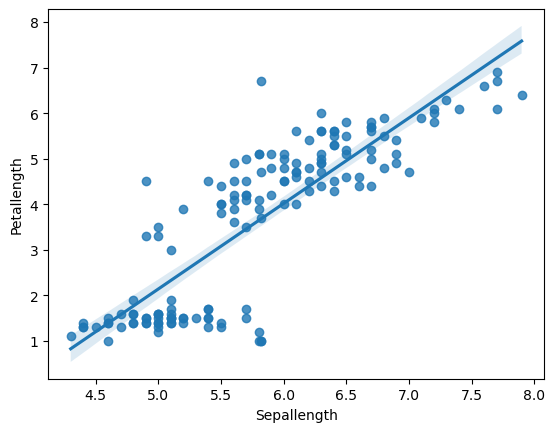

In [59]:
sns.regplot(df.Sepallength,df.Petallength)

In [60]:
corr_matrix_without_zero = corr_matrix.fillna(0)

In [61]:
corr_matrix_without_zero

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.841981,0.799270
Sepalwidth,0.000000,1.0,0.000000,0.000000
Petallength,0.841981,0.0,1.000000,0.909156
Petalwidth,0.799270,0.0,0.909156,1.000000


In [62]:
corr_matrix_without_zero[corr_matrix_without_zero >0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.841981,0.799270
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.841981,NaN,1.000000,0.909156
Petalwidth,0.799270,NaN,0.909156,1.000000


In [63]:
corr_matrix_new = corr_matrix_without_zero.drop(index='Sepalwidth')

In [64]:
corr_matrix_new

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.841981,0.799270
Petallength,0.841981,0.0,1.000000,0.909156
Petalwidth,0.799270,0.0,0.909156,1.000000


In [65]:
corr_matrix_new.drop(columns=['Sepalwidth'])

,Sepallength,Petallength,Petalwidth
Sepallength,1.000000,0.841981,0.799270
Petallength,0.841981,1.000000,0.909156
Petalwidth,0.799270,0.909156,1.000000


In [66]:
columns_ = corr_matrix_new.drop(columns=['Sepalwidth']).columns

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


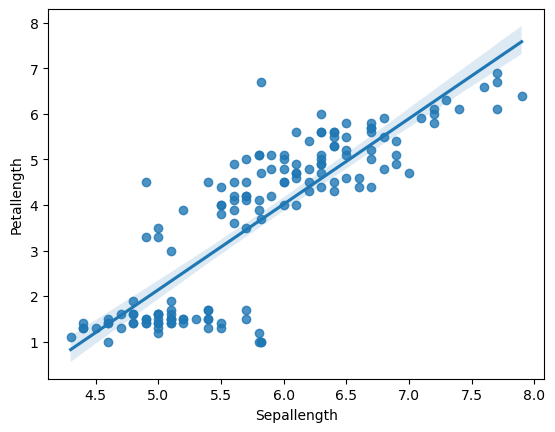

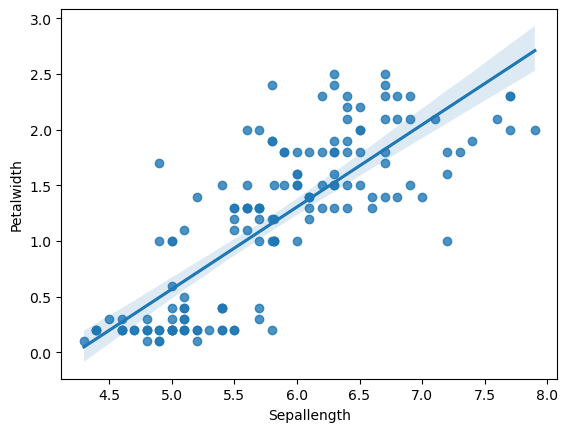

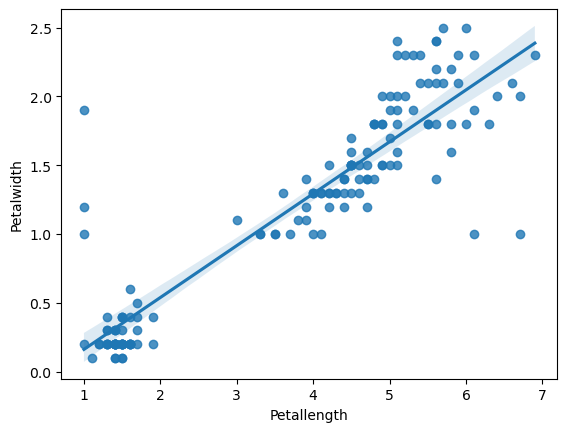

In [67]:

# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
ii=1
for i in range(len(columns_)):
    for j in range(i+1, len(columns_)):
        
        fig = plt.figure()
#         ax = fig.add_subplot(2, 2, ii)
        sns.regplot(df[columns_[i]],df[columns_[j]])
        ii+=1
  
       
        
    
    